# K means Clustering Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [4]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

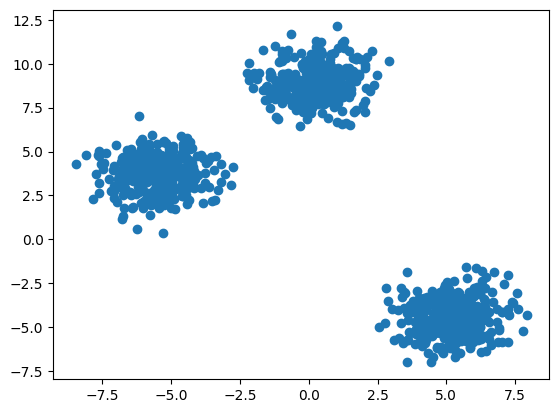

In [5]:
plt.scatter(X[:,0],X[:,1])

In [15]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=23)

In [8]:
X_train.shape

(670, 2)

In [9]:
X_test.shape

(330, 2)

In [17]:
#Elbow method to select k value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

In [18]:
wcss

[34131.539516172576,
 7986.924186891385,
 1345.6528673090693,
 1180.3100815015905,
 1029.4398839471205,
 883.2528868398932,
 788.8085261217271,
 690.1722634440471,
 591.8885927653996,
 541.8896599206552]

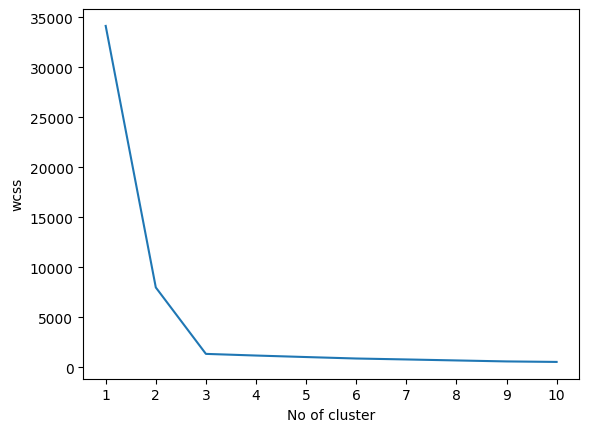

In [20]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of cluster")
plt.ylabel("wcss")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_labels=kmeans.fit_predict(X_train)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


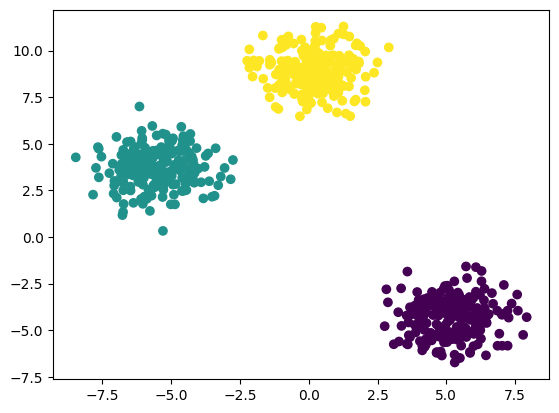

In [26]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)


In [27]:
#knee locator
!pip install kneed


In [28]:
from kneed import KneeLocator

In [31]:
K1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [32]:
K1.elbow

3

In [33]:
from sklearn.metrics import silhouette_score

In [35]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X_train)
score=silhouette_score(X_train,kmeans.labels_)
print(score)

0.8020003846062477


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
